# Stock Market CBOE VIX Analysis and Prediction using LSTM

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reading the dataset

In [2]:
data= pd.read_csv('flat-ui__data.csv')
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,03/22/2024,12.92,13.15,12.58,13.06
1,03/21/2024,12.98,13.08,12.40,12.92
2,03/20/2024,13.83,14.17,13.01,13.04
3,03/19/2024,14.50,14.86,13.80,13.82
4,03/18/2024,14.75,14.85,14.26,14.33


In [3]:
data.dtypes

DATE      object
OPEN     float64
HIGH     float64
LOW      float64
CLOSE    float64
dtype: object

In [4]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [5]:
data.dtypes

DATE     datetime64[ns]
OPEN            float64
HIGH            float64
LOW             float64
CLOSE           float64
dtype: object

In [6]:
data.describe()

,OPEN,HIGH,LOW,CLOSE
count,8632.000000,8632.000000,8632.000000,8632.000000
mean,19.629685,20.435451,18.880280,19.543306
std,7.967062,8.427376,7.458714,7.894811
min,9.010000,9.310000,8.560000,9.140000
25%,13.920000,14.500000,13.390000,13.840000
50%,17.740000,18.410000,17.145000,17.700000
75%,23.062500,23.922500,22.272500,22.942500
max,82.690000,89.530000,72.760000,82.690000


In [7]:
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,2024-03-22,12.92,13.15,12.58,13.06
1,2024-03-21,12.98,13.08,12.40,12.92
2,2024-03-20,13.83,14.17,13.01,13.04
3,2024-03-19,14.50,14.86,13.80,13.82
4,2024-03-18,14.75,14.85,14.26,14.33


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8632 entries, 0 to 8631
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    8632 non-null   datetime64[ns]
 1   OPEN    8632 non-null   float64       
 2   HIGH    8632 non-null   float64       
 3   LOW     8632 non-null   float64       
 4   CLOSE   8632 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 337.3 KB


In [9]:
data.isnull().sum()

DATE     0
OPEN     0
HIGH     0
LOW      0
CLOSE    0
dtype: int64

In [69]:
data.duplicated().sum()

0

In [10]:
data['DATE'].sort_values()

8631   1990-01-02
8630   1990-01-03
8629   1990-01-04
8628   1990-01-05
8627   1990-01-08
          ...    
4      2024-03-18
3      2024-03-19
2      2024-03-20
1      2024-03-21
0      2024-03-22
Name: DATE, Length: 8632, dtype: datetime64[ns]

In [15]:
data_24 = data[ data['DATE'].dt.year == 2024]

<Axes: xlabel='DATE'>

<Figure size 2000x1500 with 0 Axes>

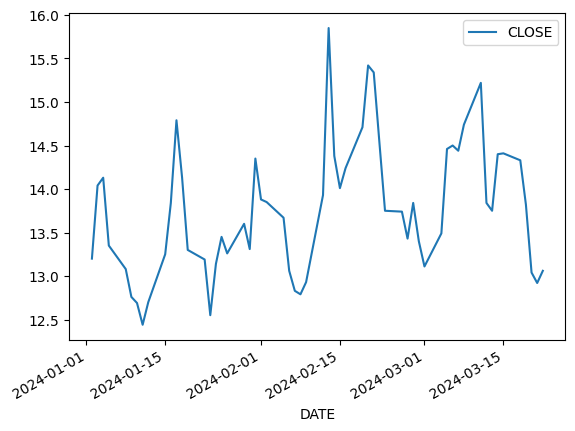

In [45]:
plt.figure(figsize=(20, 15))
data_24.plot(x = 'DATE', y= 'CLOSE')

<Axes: xlabel='DATE'>

<Figure size 2000x1500 with 0 Axes>

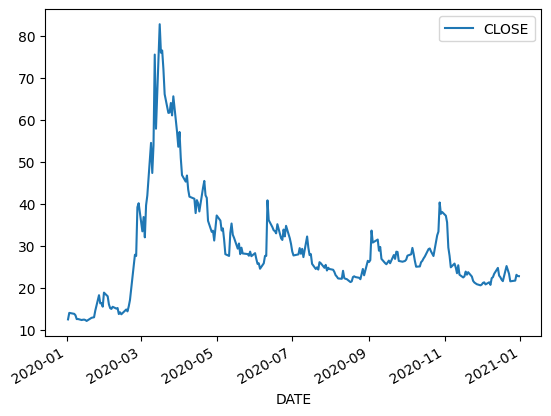

In [49]:
data_CV = data[ data['DATE'].dt.year == 2020]
plt.figure(figsize=(20, 15))
data_CV.plot(x = 'DATE', y= 'CLOSE')

<Axes: >

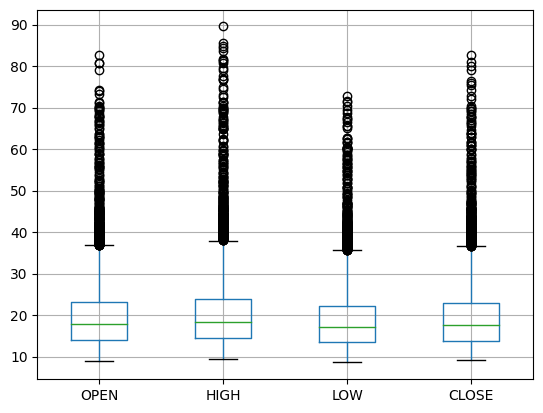

In [50]:
data.boxplot()

<Axes: title={'center': 'Close'}, ylabel='Frequency'>

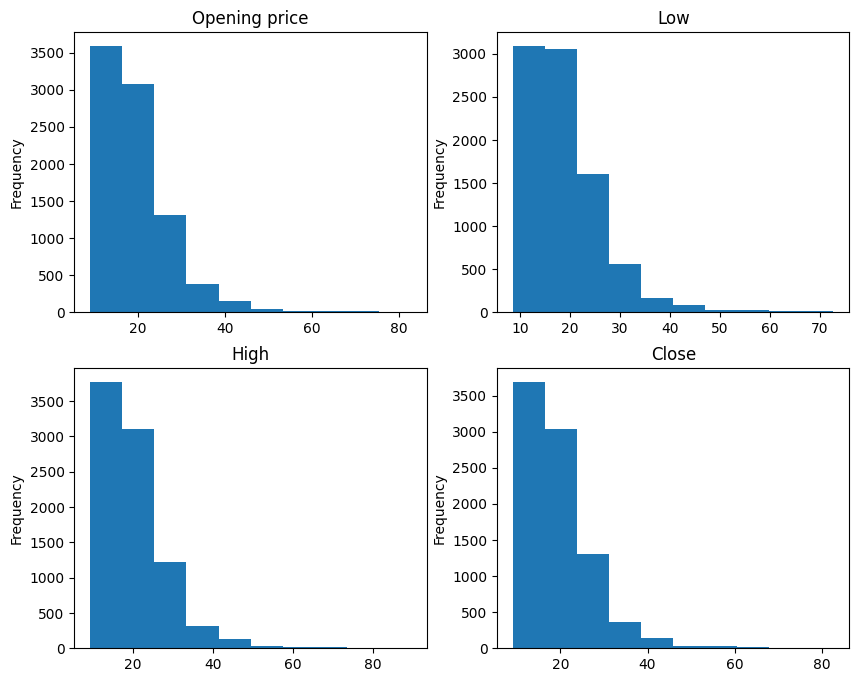

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each column in a separate subplot
data['OPEN'].plot(ax=axes[0, 0], kind='hist', title='Opening price')
data['LOW'].plot(ax=axes[0, 1], kind='hist', title='Low')
data['HIGH'].plot(ax=axes[1, 0], kind='hist', title='High')
data['CLOSE'].plot(ax=axes[1, 1], kind='hist', title='Close')

C:\Users\hanin\AppData\Local\Temp\ipykernel_17288\3687961231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='summer', fmt = '.3f')


<Axes: >

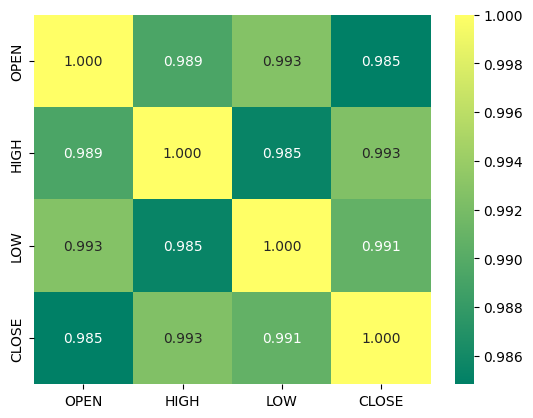

In [62]:
sns.heatmap(data.corr(), annot=True, cmap='summer', fmt = '.3f')

In [97]:
X= data.iloc[:, 1:-1]
Y = data['CLOSE']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [96]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
y_train= scaler.fit_transform(y_train)
y_test= scaler.fit_transform(y_test)


ValueError: Expected 2D array, got 1D array instead:
array=[21.26 11.7  28.75 ... 31.3  25.75 11.68].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [178]:
model = Sequential([
    LSTM(units=70, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=70),
    Dense(units=1)
])

In [179]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=64,validation_data=(X_test, y_test))

Epoch 1/20
95/95 [==============================] - 5s 21ms/step - loss: 172.1077 - val_loss: 74.3669
Epoch 2/20
95/95 [==============================] - 1s 16ms/step - loss: 66.0095 - val_loss: 62.3954
Epoch 3/20
95/95 [==============================] - 1s 15ms/step - loss: 60.9763 - val_loss: 55.2398
Epoch 4/20
95/95 [==============================] - 1s 14ms/step - loss: 36.8245 - val_loss: 27.7138
Epoch 5/20
95/95 [==============================] - 1s 14ms/step - loss: 22.5796 - val_loss: 20.2145
Epoch 6/20
95/95 [==============================] - 1s 14ms/step - loss: 16.8704 - val_loss: 16.1429
Epoch 7/20
95/95 [==============================] - 1s 13ms/step - loss: 13.5750 - val_loss: 13.4686
Epoch 8/20
95/95 [==============================] - 1s 16ms/step - loss: 11.3707 - val_loss: 11.4767
Epoch 9/20
95/95 [==============================] - 1s 15ms/step - loss: 9.7940 - val_loss: 10.0434
Epoch 10/20
95/95 [==============================] - 1s 14ms/step - loss: 8.5178 - val_loss

In [180]:
MSE = model.evaluate(X_test, y_test)
print("Test Loss:", MSE)

81/81 [==============================] - 0s 3ms/step - loss: 3.5901
Test Loss: 3.59010648727417


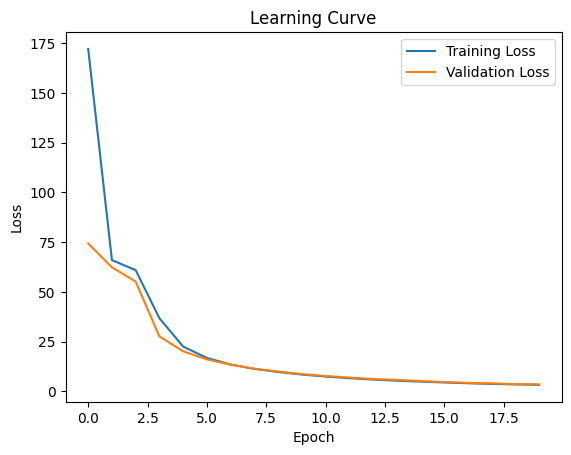

In [181]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()